# SI 618: Data Manipulation and Analysis
## 04 - Univariate Statistics & Visualization

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.


# Overview of today 

- Announcements -> Upcoming Homework
- Comments/Questions/Concerns
- Review last week: Aggregation & Grouping
- Today: Univariate Statistics  & Vizualization

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [1]:
import random
print(random.randint(1,23))
MY_UNIQNAME = 'xinyexu'

3


# ----------Aggregation and Grouping----------

## Learning Objectives
* use StringIO to create a DataFrame
* use the .describe() function
* understand .groupby()
* understand different types of merges

## Build the dataframe

In [2]:
import pandas as pd
import numpy as np

In [4]:
names = ['Gandalf',
         'Gimli',
         'Frodo',
         'Legolas',
         'Bilbo',
         'Sam',
         'Pippin',
         'Boromir',
         'Aragorn',
         'Galadriel',
         'Meriadoc',
        'Lily']
races = ['Maia',
         'Dwarf',
         'Hobbit',
         'Elf',
         'Hobbit',
         'Hobbit',
         'Hobbit',
         'Man',
         'Man',
         'Elf',
         'Hobbit',
        'Hobbit']
magic = [10, 1, 4, 6, 4, 2, 0, 0, 2, 9, 0, np.NaN]
aggression = [7, 10, 2, 5, 1, 6, 3, 8, 7, 2, 4, np.NaN ]
stealth = [8, 2, 5, 10, 5, 4 ,5, 3, 9, 10, 6, np.NaN]

In [7]:
df = pd.DataFrame({'name': names,'race':races,'magic':magic,'aggression': aggression,'stealth':stealth})

## Joining Data



Let's say we have another CSV file that contains URLs to Wikipedia pages for some of the LOTR characters:

In [8]:
urls = pd.read_csv('data/lotr_wikipedia.csv')
urls

,name,url
0,Gandalf,https://en.wikipedia.org/wiki/Gandalf
1,Gimli,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...
2,Frodo,https://en.wikipedia.org/wiki/Frodo_Baggins
3,Legolas,https://en.wikipedia.org/wiki/Legolas
4,Bilbo,https://en.wikipedia.org/wiki/Bilbo_Baggins
5,Sam,https://en.wikipedia.org/wiki/Samwise_Gamgee
6,Pippin,https://en.wikipedia.org/wiki/Peregrin_Took
7,Boromir,https://en.wikipedia.org/wiki/Boromir
8,Aragorn,https://en.wikipedia.org/wiki/Aragorn
9,Galadriel,https://en.wikipedia.org/wiki/Galadriel


Let's take a look at the original DataFrame:

It looks like the rows are "aligned", so we can use the ```concat``` function to concatenate the two DataFrames.
Note that we specify the axis to be the columns.  The default is to concatenate by rows, which isn't what we want.

In [9]:
pd.concat([df,urls],axis="columns")

,name,race,magic,aggression,stealth,name,url
0,Gandalf,Maia,10.0,7.0,8.0,Gandalf,https://en.wikipedia.org/wiki/Gandalf
1,Gimli,Dwarf,1.0,10.0,2.0,Gimli,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...
2,Frodo,Hobbit,4.0,2.0,5.0,Frodo,https://en.wikipedia.org/wiki/Frodo_Baggins
3,Legolas,Elf,6.0,5.0,10.0,Legolas,https://en.wikipedia.org/wiki/Legolas
4,Bilbo,Hobbit,4.0,1.0,5.0,Bilbo,https://en.wikipedia.org/wiki/Bilbo_Baggins
5,Sam,Hobbit,2.0,6.0,4.0,Sam,https://en.wikipedia.org/wiki/Samwise_Gamgee
6,Pippin,Hobbit,0.0,3.0,5.0,Pippin,https://en.wikipedia.org/wiki/Peregrin_Took
7,Boromir,Man,0.0,8.0,3.0,Boromir,https://en.wikipedia.org/wiki/Boromir
8,Aragorn,Man,2.0,7.0,9.0,Aragorn,https://en.wikipedia.org/wiki/Aragorn
9,Galadriel,Elf,9.0,2.0,10.0,Galadriel,https://en.wikipedia.org/wiki/Galadriel


That's great, and it's consistent with what we've used in previous classes.  But what happens if the 
rows in the two DataFrames don't match up?  Let's load another file that has a slightly different
sequence of rows:

In [10]:
urls_wrong_order = pd.read_csv('data/lotr_wikipedia_wrong_order.csv')

In [11]:
urls_wrong_order

,name,url
0,Boromir,https://en.wikipedia.org/wiki/Boromir
1,Aragorn,https://en.wikipedia.org/wiki/Aragorn
2,Gandalf,https://en.wikipedia.org/wiki/Gandalf
3,Meriadoc,https://en.wikipedia.org/wiki/Meriadoc_Brandybuck
4,Gimli,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...
5,Legolas,https://en.wikipedia.org/wiki/Legolas
6,Bilbo,https://en.wikipedia.org/wiki/Bilbo_Baggins
7,Pippin,https://en.wikipedia.org/wiki/Peregrin_Took
8,Galadriel,https://en.wikipedia.org/wiki/Galadriel
9,Lily,NaN


In [12]:
pd.concat([df,urls_wrong_order],axis="columns")

,name,race,magic,aggression,stealth,name,url
0,Gandalf,Maia,10.0,7.0,8.0,Boromir,https://en.wikipedia.org/wiki/Boromir
1,Gimli,Dwarf,1.0,10.0,2.0,Aragorn,https://en.wikipedia.org/wiki/Aragorn
2,Frodo,Hobbit,4.0,2.0,5.0,Gandalf,https://en.wikipedia.org/wiki/Gandalf
3,Legolas,Elf,6.0,5.0,10.0,Meriadoc,https://en.wikipedia.org/wiki/Meriadoc_Brandybuck
4,Bilbo,Hobbit,4.0,1.0,5.0,Gimli,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...
5,Sam,Hobbit,2.0,6.0,4.0,Legolas,https://en.wikipedia.org/wiki/Legolas
6,Pippin,Hobbit,0.0,3.0,5.0,Bilbo,https://en.wikipedia.org/wiki/Bilbo_Baggins
7,Boromir,Man,0.0,8.0,3.0,Pippin,https://en.wikipedia.org/wiki/Peregrin_Took
8,Aragorn,Man,2.0,7.0,9.0,Galadriel,https://en.wikipedia.org/wiki/Galadriel
9,Galadriel,Elf,9.0,2.0,10.0,Lily,NaN


Take a closer look at the name and url columns.  Something's not quite right.

We can work around that by using the appropriate indexing and then using the SQL-like ```join``` function. ```.join``` Join columns with other DataFrame either on index or on a key column. By default, ```join``` uses a **left** join, which means the all the values from the "left" side are used, whether or not there's a corresponding entry from the "right" side. 

In [14]:
df_names = df.set_index('name')
df_names

,race,magic,aggression,stealth
name,,,,
Gandalf,Maia,10.0,7.0,8.0
Gimli,Dwarf,1.0,10.0,2.0
Frodo,Hobbit,4.0,2.0,5.0
Legolas,Elf,6.0,5.0,10.0
Bilbo,Hobbit,4.0,1.0,5.0
Sam,Hobbit,2.0,6.0,4.0
Pippin,Hobbit,0.0,3.0,5.0
Boromir,Man,0.0,8.0,3.0
Aragorn,Man,2.0,7.0,9.0


In [16]:
urls_wrong_order_names = urls_wrong_order.set_index('name')
urls_wrong_order_names

,url
name,
Boromir,https://en.wikipedia.org/wiki/Boromir
Aragorn,https://en.wikipedia.org/wiki/Aragorn
Gandalf,https://en.wikipedia.org/wiki/Gandalf
Meriadoc,https://en.wikipedia.org/wiki/Meriadoc_Brandybuck
Gimli,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...
Legolas,https://en.wikipedia.org/wiki/Legolas
Bilbo,https://en.wikipedia.org/wiki/Bilbo_Baggins
Pippin,https://en.wikipedia.org/wiki/Peregrin_Took
Galadriel,https://en.wikipedia.org/wiki/Galadriel


In [17]:
df_names.join(urls_wrong_order_names)

,race,magic,aggression,stealth,url
name,,,,,
Gandalf,Maia,10.0,7.0,8.0,https://en.wikipedia.org/wiki/Gandalf
Gimli,Dwarf,1.0,10.0,2.0,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...
Frodo,Hobbit,4.0,2.0,5.0,https://en.wikipedia.org/wiki/Frodo_Baggins
Legolas,Elf,6.0,5.0,10.0,https://en.wikipedia.org/wiki/Legolas
Bilbo,Hobbit,4.0,1.0,5.0,https://en.wikipedia.org/wiki/Bilbo_Baggins
Sam,Hobbit,2.0,6.0,4.0,https://en.wikipedia.org/wiki/Samwise_Gamgee
Pippin,Hobbit,0.0,3.0,5.0,https://en.wikipedia.org/wiki/Peregrin_Took
Boromir,Man,0.0,8.0,3.0,https://en.wikipedia.org/wiki/Boromir
Aragorn,Man,2.0,7.0,9.0,https://en.wikipedia.org/wiki/Aragorn


In [18]:
urls_wrong_order.head()

,name,url
0,Boromir,https://en.wikipedia.org/wiki/Boromir
1,Aragorn,https://en.wikipedia.org/wiki/Aragorn
2,Gandalf,https://en.wikipedia.org/wiki/Gandalf
3,Meriadoc,https://en.wikipedia.org/wiki/Meriadoc_Brandybuck
4,Gimli,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...


In [ ]:
urls_wrong_order['name']

In [ ]:
df['name']

In [ ]:
df.merge(urls_wrong_order,on='name')

## Let's add some more data

Now let's add a few additional URLs:

In [21]:
urls_extras = pd.read_csv("data/lotr_wikipedia_extras.csv")
urls_extras

,name,url
0,Treebeard,https://en.wikipedia.org/wiki/Treebeard
1,Elrond,https://en.wikipedia.org/wiki/Elrond


And now let's use concat to add the new entries to the DataFrame.

In [22]:
urls_complete = pd.concat([urls,urls_extras])

In [25]:
urls_complete
df.head()

,name,race,magic,aggression,stealth
0,Gandalf,Maia,10.0,7.0,8.0
1,Gimli,Dwarf,1.0,10.0,2.0
2,Frodo,Hobbit,4.0,2.0,5.0
3,Legolas,Elf,6.0,5.0,10.0
4,Bilbo,Hobbit,4.0,1.0,5.0


## Merging Data

![pivot 1](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png "pivots")

By default, ```merge``` uses an **"inner"** join, which include only those values that exist in both the "left" and "right" DataFrames:

In [26]:
df.merge(urls_complete,on='name',how='inner') # intersection: exisit in both right and left df; missing Treebeard, Elrond

,name,race,magic,aggression,stealth,url
0,Gandalf,Maia,10.0,7.0,8.0,https://en.wikipedia.org/wiki/Gandalf
1,Gimli,Dwarf,1.0,10.0,2.0,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...
2,Frodo,Hobbit,4.0,2.0,5.0,https://en.wikipedia.org/wiki/Frodo_Baggins
3,Legolas,Elf,6.0,5.0,10.0,https://en.wikipedia.org/wiki/Legolas
4,Bilbo,Hobbit,4.0,1.0,5.0,https://en.wikipedia.org/wiki/Bilbo_Baggins
5,Sam,Hobbit,2.0,6.0,4.0,https://en.wikipedia.org/wiki/Samwise_Gamgee
6,Pippin,Hobbit,0.0,3.0,5.0,https://en.wikipedia.org/wiki/Peregrin_Took
7,Boromir,Man,0.0,8.0,3.0,https://en.wikipedia.org/wiki/Boromir
8,Aragorn,Man,2.0,7.0,9.0,https://en.wikipedia.org/wiki/Aragorn
9,Galadriel,Elf,9.0,2.0,10.0,https://en.wikipedia.org/wiki/Galadriel


A left join, which means the all the values from the **"left"** side are used, whether or not there's a corresponding entry from the "right" side.  In the example below, note that the url value for "Lily" is "NaN":

In [27]:
df.merge(urls_complete,on='name',how='left') # has none value 

,name,race,magic,aggression,stealth,url
0,Gandalf,Maia,10.0,7.0,8.0,https://en.wikipedia.org/wiki/Gandalf
1,Gimli,Dwarf,1.0,10.0,2.0,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...
2,Frodo,Hobbit,4.0,2.0,5.0,https://en.wikipedia.org/wiki/Frodo_Baggins
3,Legolas,Elf,6.0,5.0,10.0,https://en.wikipedia.org/wiki/Legolas
4,Bilbo,Hobbit,4.0,1.0,5.0,https://en.wikipedia.org/wiki/Bilbo_Baggins
5,Sam,Hobbit,2.0,6.0,4.0,https://en.wikipedia.org/wiki/Samwise_Gamgee
6,Pippin,Hobbit,0.0,3.0,5.0,https://en.wikipedia.org/wiki/Peregrin_Took
7,Boromir,Man,0.0,8.0,3.0,https://en.wikipedia.org/wiki/Boromir
8,Aragorn,Man,2.0,7.0,9.0,https://en.wikipedia.org/wiki/Aragorn
9,Galadriel,Elf,9.0,2.0,10.0,https://en.wikipedia.org/wiki/Galadriel


The "opposite" of a left join is, perhaps unsurprisingly, a **"right"** join, in which
all the values from the "right" side are used, whether or not a corresponding
value from the "left" side exists. Note in the following example that "Lily" has
disappeared, and Treebeard and Elrond lack information about "race", "magic", "aggression", and "stealth".

In [28]:
df.merge(urls_complete,on='name',how='right') # df.merge 

,name,race,magic,aggression,stealth,url
0,Gandalf,Maia,10.0,7.0,8.0,https://en.wikipedia.org/wiki/Gandalf
1,Gimli,Dwarf,1.0,10.0,2.0,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...
2,Frodo,Hobbit,4.0,2.0,5.0,https://en.wikipedia.org/wiki/Frodo_Baggins
3,Legolas,Elf,6.0,5.0,10.0,https://en.wikipedia.org/wiki/Legolas
4,Bilbo,Hobbit,4.0,1.0,5.0,https://en.wikipedia.org/wiki/Bilbo_Baggins
5,Sam,Hobbit,2.0,6.0,4.0,https://en.wikipedia.org/wiki/Samwise_Gamgee
6,Pippin,Hobbit,0.0,3.0,5.0,https://en.wikipedia.org/wiki/Peregrin_Took
7,Boromir,Man,0.0,8.0,3.0,https://en.wikipedia.org/wiki/Boromir
8,Aragorn,Man,2.0,7.0,9.0,https://en.wikipedia.org/wiki/Aragorn
9,Galadriel,Elf,9.0,2.0,10.0,https://en.wikipedia.org/wiki/Galadriel


In addition to "left" and "right" joins, we have **"outer"** joins, which include
values from both the "left" and "right" DataFrames, regardless of whether
there are corresponding values in the other DataFrame.  Note that all of 
"Lily", "Treebeard" and "Elrond" are present in the following DataFrame:

In [29]:
df.merge(urls_complete,on='name',how='outer')

,name,race,magic,aggression,stealth,url
0,Gandalf,Maia,10.0,7.0,8.0,https://en.wikipedia.org/wiki/Gandalf
1,Gimli,Dwarf,1.0,10.0,2.0,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...
2,Frodo,Hobbit,4.0,2.0,5.0,https://en.wikipedia.org/wiki/Frodo_Baggins
3,Legolas,Elf,6.0,5.0,10.0,https://en.wikipedia.org/wiki/Legolas
4,Bilbo,Hobbit,4.0,1.0,5.0,https://en.wikipedia.org/wiki/Bilbo_Baggins
5,Sam,Hobbit,2.0,6.0,4.0,https://en.wikipedia.org/wiki/Samwise_Gamgee
6,Pippin,Hobbit,0.0,3.0,5.0,https://en.wikipedia.org/wiki/Peregrin_Took
7,Boromir,Man,0.0,8.0,3.0,https://en.wikipedia.org/wiki/Boromir
8,Aragorn,Man,2.0,7.0,9.0,https://en.wikipedia.org/wiki/Aragorn
9,Galadriel,Elf,9.0,2.0,10.0,https://en.wikipedia.org/wiki/Galadriel


Sometimes it's nice to know how a particular row got added to the resulting DataFrame.  Using **```indicator=True```**
allows us to examine this:

In [30]:
df.merge(urls_complete,how='outer',indicator=True) # indicator=True: crete a indicator both/left/right

,name,race,magic,aggression,stealth,url,_merge
0,Gandalf,Maia,10.0,7.0,8.0,https://en.wikipedia.org/wiki/Gandalf,both
1,Gimli,Dwarf,1.0,10.0,2.0,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...,both
2,Frodo,Hobbit,4.0,2.0,5.0,https://en.wikipedia.org/wiki/Frodo_Baggins,both
3,Legolas,Elf,6.0,5.0,10.0,https://en.wikipedia.org/wiki/Legolas,both
4,Bilbo,Hobbit,4.0,1.0,5.0,https://en.wikipedia.org/wiki/Bilbo_Baggins,both
5,Sam,Hobbit,2.0,6.0,4.0,https://en.wikipedia.org/wiki/Samwise_Gamgee,both
6,Pippin,Hobbit,0.0,3.0,5.0,https://en.wikipedia.org/wiki/Peregrin_Took,both
7,Boromir,Man,0.0,8.0,3.0,https://en.wikipedia.org/wiki/Boromir,both
8,Aragorn,Man,2.0,7.0,9.0,https://en.wikipedia.org/wiki/Aragorn,both
9,Galadriel,Elf,9.0,2.0,10.0,https://en.wikipedia.org/wiki/Galadriel,both


You'll note that we used the ```merge``` function from the DataFrame and passed in the other DataFrame as an argument.
You can also call the ```merge``` function from pandas directly and pass it the two DataFrames you are merging:

In [31]:
pd.merge(df,urls_complete,how='outer',indicator=True)

,name,race,magic,aggression,stealth,url,_merge
0,Gandalf,Maia,10.0,7.0,8.0,https://en.wikipedia.org/wiki/Gandalf,both
1,Gimli,Dwarf,1.0,10.0,2.0,https://en.wikipedia.org/wiki/Gimli_(Middle-ea...,both
2,Frodo,Hobbit,4.0,2.0,5.0,https://en.wikipedia.org/wiki/Frodo_Baggins,both
3,Legolas,Elf,6.0,5.0,10.0,https://en.wikipedia.org/wiki/Legolas,both
4,Bilbo,Hobbit,4.0,1.0,5.0,https://en.wikipedia.org/wiki/Bilbo_Baggins,both
5,Sam,Hobbit,2.0,6.0,4.0,https://en.wikipedia.org/wiki/Samwise_Gamgee,both
6,Pippin,Hobbit,0.0,3.0,5.0,https://en.wikipedia.org/wiki/Peregrin_Took,both
7,Boromir,Man,0.0,8.0,3.0,https://en.wikipedia.org/wiki/Boromir,both
8,Aragorn,Man,2.0,7.0,9.0,https://en.wikipedia.org/wiki/Aragorn,both
9,Galadriel,Elf,9.0,2.0,10.0,https://en.wikipedia.org/wiki/Galadriel,both


## Group By

In [32]:
# to start let's make a fake dataset: sales of fruit across US states.
# Don't worry about the details here, but basically we'll pretend
# this string is a CSV file and use the standard loading ops
from io import StringIO

TESTDATA=StringIO("""State,Retailer,Fruit,Sales
MI,Walmart,Apple,100
MI,Wholefoods,Apple,150
MI,Kroger,Orange,180
CA,Walmart,Apple,220
CA,Wholefoods,Apple,180
CA,Safeway,Apple,220
CA,Safeway,Orange,110
NY,Walmart,Apple,90
NY,Walmart,Orange,80
NY,Wholefoods,Orange,120
""")

fruit = pd.read_csv(TESTDATA, index_col=None)

In [33]:
fruit.head()

,State,Retailer,Fruit,Sales
0,MI,Walmart,Apple,100
1,MI,Wholefoods,Apple,150
2,MI,Kroger,Orange,180
3,CA,Walmart,Apple,220
4,CA,Wholefoods,Apple,180


## (a) What is the total sales for each state?
This requires us to group by state, and aggregate sales by taking the sum.

The easiest way of doing this if to use `groupby`

If you execute groupby on the dataframe what you'll get back is an object called DataFrameGroupBy

In [35]:
fruit.groupby('State') # onley some objects, like pivit table, need an aggregation funciton

On its own it's a bit useless... it just keeps track of which rows should go into each "pile" (where pile here means a unique group for each state)

If we ask this object to describe itself, you can see what is inside notice that it threw away all the other columns because they were not numerical.  Only "Sales" which is a number, was kept

In [36]:
fruit.groupby('State').describe()

Sales                                                          
      count        mean        std    min    25%    50%    75%    max
State                                                                
CA      4.0  182.500000  51.881275  110.0  162.5  200.0  220.0  220.0
MI      3.0  143.333333  40.414519  100.0  125.0  150.0  165.0  180.0
NY      3.0   96.666667  20.816660   80.0   85.0   90.0  105.0  120.0

In [39]:
# What are the total sales for each state?
fruit.groupby('State').sum()  # instead of size()

,Sales
State,
CA,730
MI,430
NY,290


What just happend? A couple of things:
- `groupby()` got first executed on `df`, returning an `DataFrameGroupBy` object. This object itself is useless unless coupled with an aggregation function, such as `sum()`, `mean()`, `max()`, `apply()`. We will talk about `apply()` more in the next week.
- Then, `sum()` got executed on the `DataFrameGroupBy` object, generating the `DataFrame` object you see above. Notice how the table looks different than the original DataFrame `df`? Here are the differences:
  - The `State` column now becomes the index of the DataFrame. The string "State" is the name of the index. Notice how the index name is displayed on a lower level than column names.
  - Since we performed a `groupby` operation by `State`, so only the unique values of `State` are kept as index.
  - Among the other columns, Retailer, Fruit, and Sales, only Sales is kept in the result table. This is because the aggregation function `sum()` only knows how to aggregate numerical values. And only Sales is a numerical column. The other columns are hence dropped.

## (b) What is the total sales for each state for each fruit?
This requires us to perform `groupby` on two columns. So, we provide a list of column names to the `groupby` function.

Don't forget that an aggregation function needs to follow the `groupby` function in order to generate results.

In [42]:
# What is the total sales for each state for each fruit?
fruit.groupby(['State','Fruit']).sum()

Sales
State Fruit        
CA    Apple     620
      Orange    110
MI    Apple     250
      Orange    180
NY    Apple      90
      Orange    200

How is this DataFrame different from the previous one?

The biggest different is that this DataFrame has what is called a `MultiIndex` (or hierarchical index), as opposed to a simple index. In this table, the left two "columns" are not columns but actually part of the `MultiIndex`, and the `Sales` is the single real "column" in the DataFrame. (Running out of terminologies here...)

The hierarchical index can be organized in an alternative way if we swapped the order of State and Fruit.

In [43]:
fruit.groupby(['Fruit','State']).sum()

Sales
Fruit  State       
Apple  CA       620
       MI       250
       NY        90
Orange CA       110
       MI       180
       NY       200

## (c) Which state has the maximum total sales?
This question is not asking about the maximum value, but rather which state holds that maximum. There are multiple ways to do it. A principled way is to use `idxmax`.

In [46]:
# Which state has the maximum total sales?
fruitSalesByState = fruit.groupby('State').sum()
print(fruitSalesByState)
max_state = fruitSalesByState['Sales'].idxmax() #  find the max of that value and get its index
print("The state with the maximum sales is: ",max_state)

       Sales
State       
CA       730
MI       430
NY       290
The state with the maximum sales is:  CA


What if we wanted to get the sales value of CA again?

In [51]:
fruitSalesByState['Sales'][max_state]

730

## (d) Which state has the maximum total sales for apples?</font>

In [52]:
# Which state has the maximum total sales for apples?
# give me apple sellers
apples = fruit[fruit.Fruit == 'Apple']
apples

,State,Retailer,Fruit,Sales
0,MI,Walmart,Apple,100
1,MI,Wholefoods,Apple,150
3,CA,Walmart,Apple,220
4,CA,Wholefoods,Apple,180
5,CA,Safeway,Apple,220
7,NY,Walmart,Apple,90


In [53]:
# aggr. by state
applesByState = apples.groupby('State').sum()
applesByState

,Sales
State,
CA,620
MI,250
NY,90


In [54]:
applesByState.Sales

State
CA    620
MI    250
NY     90
Name: Sales, dtype: int64

In [58]:
applesByState.Sales.idxmax() # find the max value's id

'CA'

In [59]:
applesByState.loc[applesByState.Sales.idxmax()]

Sales    620
Name: CA, dtype: int64

In the above command, `.loc[]` looks up the index label and returns that row.



# ----------Univariate Statistics----------

In [60]:
MY_UNIQNAME = 'xinyexu'

# A quick note about Markdown cells
We have encouraged you to use Markdown cells to add text to your notebooks.  Please see 
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for a more complete explanation of the use of Markdown in Jupyter.  You can also examine any of the existing Markdown blocks by clicking on them.

# So, you want to explore your data...
* How can we describe it?
* What does it look like?
* What sorts of "preliminary checks" can we perform on our data? 
 * Why would we want to to this?

# Eyeballing your data: plotting
* Introducing [Seaborn](http://seaborn.pydata.org/)
> Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Um, ok.  How about [some examples](http://seaborn.pydata.org/examples/index.html)?

# Think about plotting the relationship between X and Y
![](resources/AnscombeData.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# A nice linear relationship, right?
![](resources/AnscombeQ1.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# Anscombe's Quartet
![](resources/AnscombePlot.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

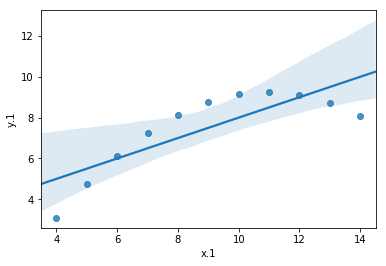

In [75]:
import pandas as pd
frames = pd.read_html("https://en.wikipedia.org/wiki/Anscombe's_quartet", header = 1) # USING header to delete first 2 lines
df = frames[1]
# del(frames[0])
# df
df['x'] # dtype is float

import seaborn as sns
sns.regplot(df['x.1'], df['y.1'])

In [74]:
df

,x,y,x.1,y.1,x.2,y.2,x.3,y.3
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


# Why do we care?

* Statistical analysis requires good inputs
 * Remember Anscombe’s quartet
 * Which model should we use?
 * Tendencies/trends/patterns in data are important in picking the right models
* Anomalies are important to detect and understand




## Purpose of EDA (broadly) Exploratory data analysis
* maximize insight into a data set
* uncover underlying structure
* extract important variables
* detect outliers and anomalies
* test underlying assumptions
* develop parsimonious models and
* determine optimal factor settings.

(National Institute of Standards and Technology)

## Our primary goal in this class: understand the _downstream_ statistical analyses enough so that we can make good decisions

# Spherical cows
The phrase comes from a joke that spoofs the simplifying assumptions that are sometimes used in theoretical physics.

>Milk production at a dairy farm was low, so the farmer wrote to the local university, asking for help from academia. A multidisciplinary team of professors was assembled, headed by a theoretical physicist, and two weeks of intensive on-site investigation took place. The scholars then returned to the university, notebooks crammed with data, where the task of writing the report was left to the team leader. Shortly thereafter the physicist returned to the farm, saying to the farmer, "I have the solution, but it works only in the case of spherical cows in a vacuum". [Wikipedia](https://en.wikipedia.org/wiki/Spherical_cow)

![Spherical cow](resources/Spot_the_cow.gif)




## The average weight of a Jersey cow is 1,000 lbs.
![](resources/jersey.jpg)

# Let's make some spherical cows...

In [76]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [77]:
# The weights of a herd of 80 cows
measures = (np.random.standard_normal(80)*150+1000).astype(int)
measures

array([ 980,  956, 1067,  994,  817,  865,  903,  957, 1073,  756, 1077,
       1440,  799, 1083, 1144, 1197, 1075, 1305, 1253, 1082,  985,  948,
        861, 1089,  988, 1091,  668,  896, 1045,  961, 1192, 1048,  845,
       1034,  993, 1034,  861, 1011, 1060,  816,  766,  988, 1285,  878,
        942, 1039,  857, 1293,  929, 1240,  874, 1146,  856,  859, 1016,
       1159, 1201, 1098,  998, 1204, 1160, 1256, 1262, 1078,  803,  993,
        991, 1003, 1188, 1277, 1032, 1189, 1301, 1185,  988,  978, 1025,
       1067,  643,  976])

# <font color="red">BEGIN Q1: Create some objects of your own
Think of some object and some property of that object.  I used cows and their weights.  Pick something that you know something about, and create a NumPy array of some number of them (ideally between 20 and 50000), recording some property.  So you might choose something like the height of undergraduate students, etc.  Pick somethink that will *likely* have a normal distribution (which is probably most things you can think of.</font>

First, pick the number that you want and assign it to numberOfObjects, then pick the mean value and assign it to meanOfProperty, and finally pick the variance and assign it to varianceOfProperty.  It doesn't matter what you pick, but if you're unsure pick 1/5 of the mean.

In [142]:
numberOfObjects = 200    # change np.NaN to some number between 20 and 50000
meanOfProperty = 5     # change np.NaN to the mean value of the property you're interested in
standardDeviationOfProperty = meanOfProperty/5  # change np.NaN to the variance of the property -- try meanOfProperty/5 if you have no idea

Now create some data by asking for a random sample from a normal distribution, scaled so that it matches the mean and variance you want:

In [171]:
things = np.random.standard_normal(numberOfObjects)*standardDeviationOfProperty+meanOfProperty
# And let's say we want integers instead of floats:
things = things.astype(float)
things

array([5.80631952, 5.29428837, 5.78620663, 4.70196418, 6.67749421,
       3.90831619, 4.48559707, 4.45375994, 4.41584235, 3.47452794,
       3.66921881, 6.18508017, 5.36774501, 5.43536452, 6.08494224,
       2.84291052, 5.56106793, 5.64513388, 5.58682281, 4.30530703,
       3.747169  , 6.04332651, 6.22886886, 5.91691364, 4.94885718,
       4.39987909, 4.91426718, 5.73239069, 4.03252732, 4.94861026,
       4.85848814, 5.04462469, 6.25756369, 4.6274411 , 4.89256503,
       3.68342165, 5.54570765, 4.978127  , 5.5172061 , 6.19405168,
       4.74364299, 6.22139053, 4.26672715, 6.27061061, 5.16519442,
       5.91662999, 4.08394403, 5.91778711, 5.94425858, 4.9040613 ,
       5.29783735, 5.8821153 , 3.55308231, 5.81098608, 4.74563338,
       4.22281628, 5.61378351, 4.16850283, 4.5372909 , 4.69584377,
       4.75019817, 4.44078508, 5.86327792, 5.37989824, 5.4878445 ,
       3.7537946 , 4.94676306, 5.70361977, 6.36320185, 5.23446992,
       5.657677  , 3.60990051, 6.54473565, 5.93392457, 3.07323

_Explain your answer here._ : 
I create a dataframe with 20 data,  mean = 5, var = 5

# <font color="red">END Q1</font>

## Measures of central tendency
* Mean
* Median 
* Mode

## Mean

Add up all the values and divide by the number of values:

$$mean = \frac {\sum{x_i}} {n}$$


In [144]:
sum(measures)/len(measures)

1028.4

In [145]:
np.mean(measures) # find the mean

1028.4

## Median

sort all the numbers and find the one in the middle

In [85]:
measures = np.sort(measures)
measures

array([ 643,  668,  756,  766,  799,  803,  816,  817,  845,  856,  857,
        859,  861,  861,  865,  874,  878,  896,  903,  929,  942,  948,
        956,  957,  961,  976,  978,  980,  985,  988,  988,  988,  991,
        993,  993,  994,  998, 1003, 1011, 1016, 1025, 1032, 1034, 1034,
       1039, 1045, 1048, 1060, 1067, 1067, 1073, 1075, 1077, 1078, 1082,
       1083, 1089, 1091, 1098, 1144, 1146, 1159, 1160, 1185, 1188, 1189,
       1192, 1197, 1201, 1204, 1240, 1253, 1256, 1262, 1277, 1285, 1293,
       1301, 1305, 1440])

In [86]:
measures[len(measures)//2]  # find middle value

1025

In [87]:
np.median(measures)

1020.5

## Another alternative: Mode

* mode = most common value
* Unfortunately not in default numpy


In [92]:
from scipy import stats
stats.mode(measures) # mode = most common value

ModeResult(mode=array([988]), count=array([3]))

# <font color="red">BEGIN Q2: Calculate the mean, median and mode of your "things"

Step 1: Just run the following cell (assumes you have some data in an np array called "things")

In [172]:
from scipy import stats # just in case we didn't already do it

thingsMean = np.mean(things) # replace 0 with your code
thingsMedian = np.median(things) # replace 0 with your code
thingsMode = stats.mode(things)[0].item() # replace 0 with your code

print(thingsMean, thingsMedian, thingsMode)

5.027938688529191 4.986680073753029 2.2415674645558314


Step 2: Now, to demonstrate what happens to mean, median and mode when you add an outlier, append some crazy big value to the end of your things.  But let's not mess up our things array, so let's copy it first

In [173]:
outliers = 10000 # change np.nan to some extreme value

things2 = things.copy()
things2 = np.append(things2,outliers)
things2Mean = np.mean(things2).round(2)
things2Median = np.median(things2)
things2Mode = stats.mode(things2)[0].item()

print(things2Mean, things2Median, things2Mode)

54.75 4.995233147466126 2.2415674645558314


Step 3: Record, in your own words, what happened to each of the mean, median and mode when you added that value:

_Explain your answer here._
we have assumed an outlier 100, so it has huge influence on mean, but median and mode will not be changed by outliers

# <font color="red">END Q2</font>

## Measures of dispersion

* Percentile cutoffs
 * Interpercentile range
* Variance
* Standard Deviation

## Percentiles

* In a *sorted* list, find the threshold so that data is split
 * 5th percentile -- bottom 5% of measures below threshold
 * 25th percentile -- bottom 25% of measures below
 * 97th percentile -- bottom 97% of mesures below

## Numpy does this well

`np.percentile(array,percentile,
               interpolation='linear')`

* linear: i + (j - i) 
* fraction, where fraction is the fractional part of the index surrounded by i and j.
* lower: i.
* higher: j.
* nearest: i or j, whichever is nearest.
* midpoint: (i + j) / 2.


In [174]:
np.percentile(measures,25) # the 25th percentile

938.75

In [101]:
np.percentile(measures,25,interpolation='higher') # bump it up to the next higher real value from the data

942

## Interpercentile Range

* Sometimes we want to some range
 * e.g., 5th -- 95th percentile: 90% of measures sit here

In [102]:
print(np.percentile(measures,5),"-",np.percentile(measures,95))

797.35 - 1285.3999999999999


## Variance

How does the data spread around the mean?

$$ variance = \frac{\sum{(x_i - \mu)^2}}{n}$$

where, $\mu$ is the mean

$$ mu = \frac{\sum{x_i}}{n}$$

## Standard Deviation

* Measure of dispersion 

![standard deviation](resources/Standard_deviation_diagram.svg.png)
(https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/640px-Standard_deviation_diagram.svg.png "sd")

In [103]:
print(np.percentile(measures,2.5),"-",np.percentile(measures,97.5))
print(np.var(measures))
print(np.std(measures))  # this should be the square root of variance

753.8 - 1301.1
24544.765000000003
156.66768971297176


# <font color="red">BEGIN Q3: Measures of dispersion</font>
Examine the 2.5-97.5 percentile range and the standard deviation of your "things".
Does the output for standard deviation match what you asked for when you first generated the data in Q1? What's the relationship between the 2.5th-to-97.5th percentile range and the standard deviation? Answer below.

In [149]:
#Enter your code here
print(np.percentile(things,2.5),"-",np.percentile(things,97.5))
print(np.std(things))

2.0 - 6.025000000000006
1.047091209016674


_Explain your answer here._
quantile for 2.5% - 97.5% is 2.0 - 6.025000000000006; the std_dev = 1.047091209016674. 97.5 is about mean + 2*std-dev, 2.5 is about mean - 2*std-dev, 

# <font color="red">END Q3</font>

# Visualizing data with Seaborn
* Visualization package built on top of matplotlib
* It's meant to make your life better
* Plays well with pandas, numpy, scipy, and statsmodels
* Many different visualization are included:
 * Strip plots, Swarm plots, Violin plots
 * Box plots
 * Histograms
 
 We need to import the package, and it's typically imported as sns:
 
 ```
 import seaborn as sns
 ``` 
 
 and don't forget to inline matplotlib (that's a jupyter thing):

 ```
 %matplotlib inline
 ```

[seaborn.pydata.org](http://seaborn.pydata.org)

In [109]:
import seaborn as sns

In [110]:
print(sns.__version__)

0.9.0


In [ ]:
# If needed update to 0.8 !conda update -y seaborn 

## Strip Plot

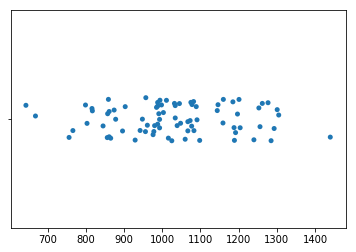

In [150]:
%matplotlib inline
import seaborn as sns  # you might need to do: conda install seaborn
sns.stripplot(x=measures)

## Swarm Plot

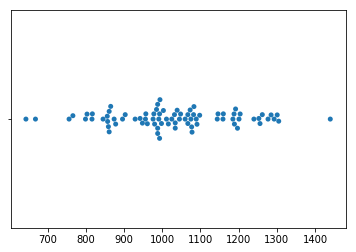

In [151]:
sns.swarmplot(x=measures)

## Violin Plot
* If we have too much data

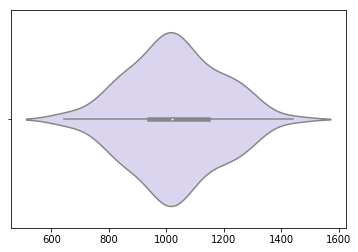

In [152]:
sns.violinplot(x=measures,color="#d7d0f3")

## Box Plot

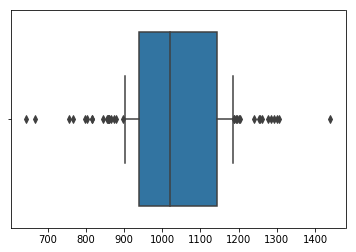

In [153]:
sns.boxplot(x=measures, fliersize = 5, whis = 0.2) 
# #  fliersize : float, optional
#         Size of the markers used to indicate outlier observations.
# whis : float, optional
#         Proportion of the IQR past the low and high quartiles to extend the
#         plot whiskers. Points outside this range will be identified as
#         outliers.

In [135]:
# help(sns.boxplot)

And we can manipulate the underlying plot to control different features.  See 
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python#34162641
and
https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots for explanations about ```plt.subplots()```



(array([ 600.,  700.,  800.,  900., 1000., 1100., 1200., 1300., 1400.,
        1500.]), <a list of 10 Text xticklabel objects>)

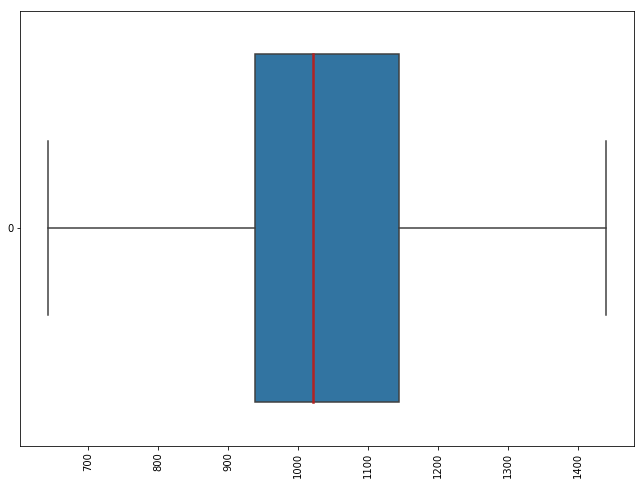

In [154]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
medianprops = dict( linewidth=2.5, color='firebrick')
sns.boxplot(medianprops=medianprops,data=measures,orient='h')
plt.xticks(rotation=90)


## Histogram

We're going to use this a lot.  Seaborn puts a nice smooth line over a distribution.  We'll talk about that soon, but for now just think about it as an extrapolation:  if we had a bunch more data, the distribution would eventually smooth out to something that looks like the line.

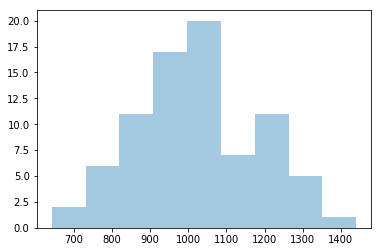

In [137]:
# x axis = value, y axis = count (frequency)
sns.distplot(measures, kde=False); 

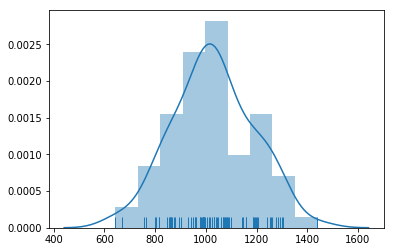

In [138]:
sns.distplot(measures, rug=True); # show a strip plot on bottom -- we call it a "rug"

# <font color="red">BEGIN Q4: Test driving Seaborn</font>
Your turn:  create the above plots (strip, swarm, violin, box, and histogram for your "things".

In [139]:
%matplotlib inline
import seaborn as sns  # you might need to do: conda install seaborn
import matplotlib.pyplot as plt # in case we want to manipulate the underlying matplotlib layer

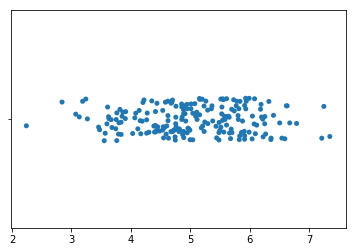

In [175]:
sns.stripplot(x=things)

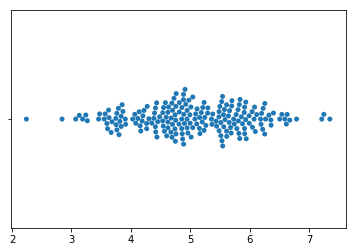

In [176]:
sns.swarmplot(x=things)

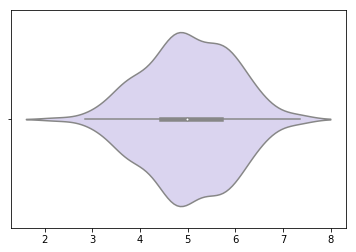

In [177]:
sns.violinplot(x=things,color="#d7d0f3")

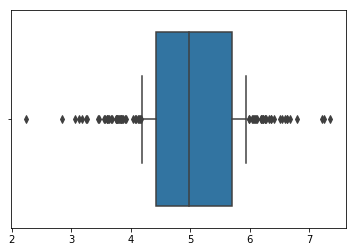

In [178]:
sns.boxplot(x=things, fliersize = 5, whis = 0.2) 

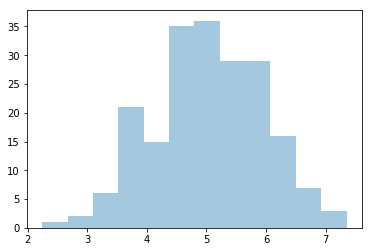

In [179]:
sns.distplot(things, kde=False) 

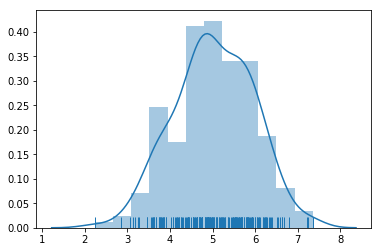

In [180]:
sns.distplot(things, rug=True)

Chose two plots from the ones you generated above and in your own words explain what each of them tells you about your data.

_Explain your answer here._
The last two plot shows a similar normal distributin trend of the data. From swarmplot plot, we can notice that there are high percentage of points lie in the middle of the data range. 

# <font color="red">END  Q4</font>

## Expressiveness, Effectiveness, Scale

* Expressiveness
 * What facts can we extract?
 * What facts *can't* we extract?
* How well can we extract them?
* How do they work with more data?
 * Consider different dimensions
 * More samples
 * More univariate data

## Why do we care about distributions?
## World is not normal
* Many other kinds of distributions
* We can tell what they are by looking at distribution

## Uniform

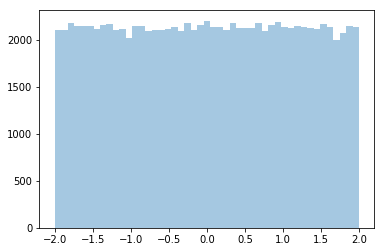

In [183]:
uniform = np.random.uniform(-2,2,100000)  # low,high,count
sns.distplot(uniform,kde=False,norm_hist=False)

## Bimodal (bivariate normal)

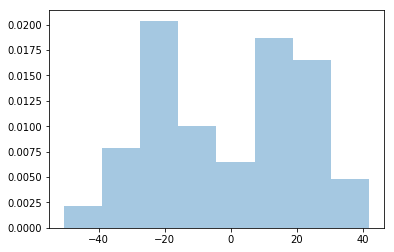

In [182]:
bimodal = np.append(np.random.normal(-20,10,100),
                    np.random.normal(20,10,100))
sns.distplot(bimodal,kde=False,norm_hist=True)

# Poisson

$$ P(k~events~in~interval) = \frac{\lambda^ke^{-\lambda}}{k!} $$

$\lambda$ is the event rate

Examples
* Meteor strikes
* Arrival of patients to hospital

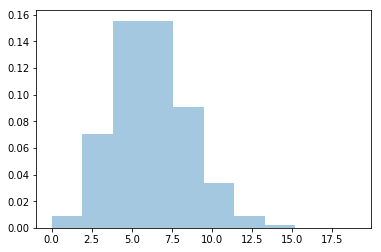

In [188]:
# as lambda goes up --> looks more normal
pois = np.random.poisson(6,100000) # lambda, count # lambda, change the size, if reduce, skewness will be heavy on one side. Models: people arrive in store
sns.distplot(pois,kde=False,bins=10,norm_hist=True)

# Power/Zipf/Pareto

$$ P = \frac{x^{-a}}{\zeta(a)}$$

"long tail"
* degree distribution
* movie/music popularity
* words

## Note:  both axes are log-transformed

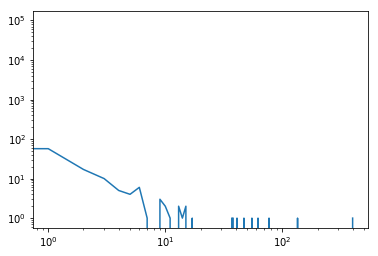

In [186]:
# bit of a hack (seaborn)
power = np.random.zipf(2,100000)
ax = plt.plot(np.histogram(power,bins=400)[0])
ax[0].axes.set_xscale("log")
ax[0].axes.set_yscale("log")

## Visual Tests on Data

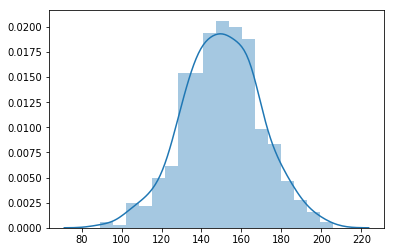

In [204]:
testdata = (np.random.standard_normal(500)*20+150).astype(int)
sns.distplot(testdata)

## Run Sequence
* Run Sequence (index versus value)
* flat and non-drifting
 * fixed-location assumption holds
* vertical spread same over the entire plot, 
 * then the fixed-variation assumption holds.

Text(0.5, 0, 'i')

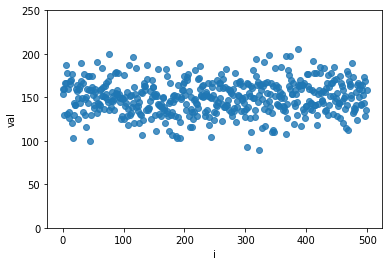

In [205]:
ax = sns.regplot(np.arange(len(testdata)),testdata,fit_reg=False)
ax.set_ylim(0,250)
ax.set_ylabel("val")
ax.set_xlabel("i")

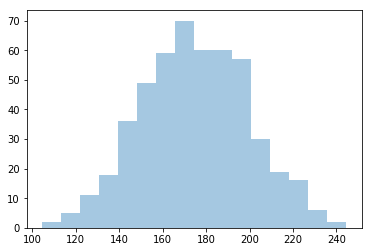

In [213]:
drifting = np.array([testdata[i]+i*(.1) for i in np.arange(len(testdata))])
sns.distplot(drifting,kde=False)

Text(0.5, 0, 'i')

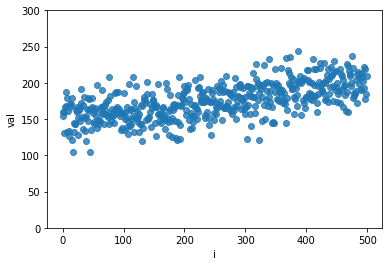

In [214]:
ax = sns.regplot(np.arange(len(drifting)),drifting,fit_reg=False)
ax.set_ylim(0,300)
ax.set_ylabel("val")
ax.set_xlabel("i")

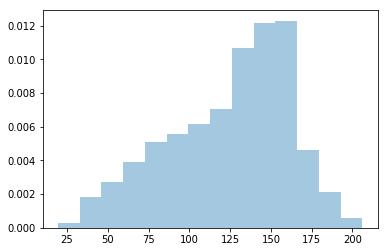

In [215]:
expanding = np.array([(testdata[i]+i*np.random.randint(-1,1)*.2)
                     for i in np.arange(len(testdata))])
sns.distplot(expanding,kde=False,norm_hist=True)

Text(0.5, 0, 'i')

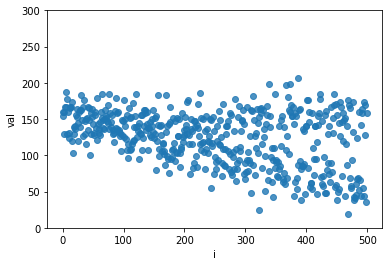

In [216]:
ax = sns.regplot(np.arange(len(expanding)),expanding,fit_reg=False)
ax.set_ylim(0,300)
ax.set_ylabel("val")
ax.set_xlabel("i")

# Lag Plot

* Plot point $y_i$ versus $y_{i-1}$
* If the lag plot is structureless
 * randomness assumption holds.

Text(0.5, 0, 'y_i')

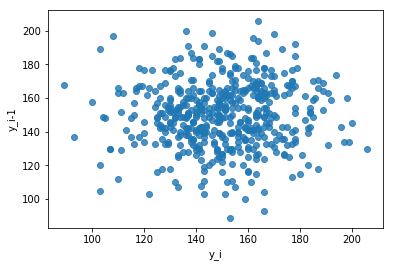

In [217]:
lag = testdata.copy()
lag = np.array(lag[:-1])
current = testdata[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

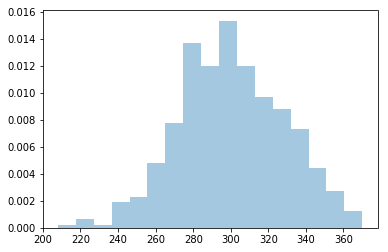

In [218]:
connected = np.array([testdata[i]+testdata[i-1] for i in np.arange(500)])
sns.distplot(connected,kde=False,norm_hist=True)

Text(0.5, 0, 'y_i')

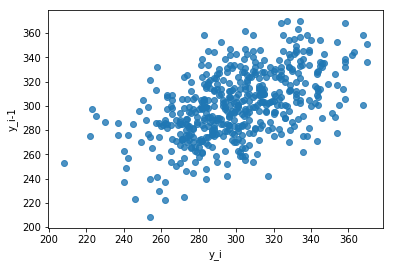

In [219]:
lag = connected.copy()
lag = np.array(lag[:-1])
current = connected[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

## QQ Plot
* QQ Plots takes our n ordered data points
 * sorted from smallest to largest
* Asks:
 * What is the relationship between quantiles from our data and quantiles from a theoretical distribution that we're assuming the sample is drawn from

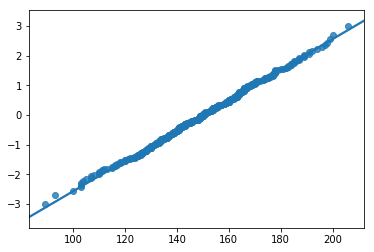

In [220]:
qntls, xr = stats.probplot(testdata, fit=False)
sns.regplot(xr,qntls)

In [221]:
def random_snorm(n, mean = 0, sd = 1, xi = 1.5):
    def random_snorm_aux(n, xi):
        weight = xi/(xi + 1/xi)
        z = np.random.uniform(-weight,1-weight,n)
        xi_ = xi**np.sign(z)
        random = -np.absolute(np.random.normal(0,1,n))/xi_ * np.sign(z)
        m1 = 2/np.sqrt(2 * np.pi)
        mu = m1 * (xi - 1/xi)
        sigma = np.sqrt((1 - m1**2) * (xi**2 + 1/xi**2) + 2 * m1**2 - 1)
        return (random - mu)/sigma

    return random_snorm_aux(n, xi) * sd + mean


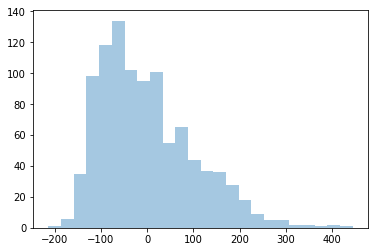

In [222]:
rightskewed = random_snorm(1000,xi=2)*100
sns.distplot(rightskewed,kde=False)

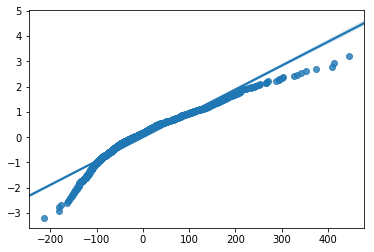

In [223]:
qntls, xr = stats.probplot(rightskewed, fit=False)
sns.regplot(xr,qntls)

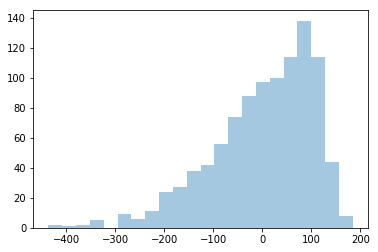

In [224]:
leftskewed = random_snorm(1000,xi=-2)*100
sns.distplot(leftskewed,kde=False)

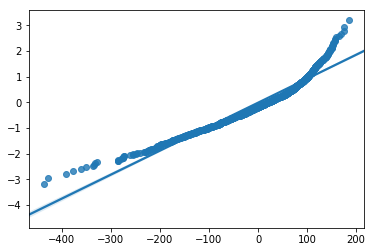

In [225]:
qntls, xr = stats.probplot(leftskewed, fit=False)
sns.regplot(xr,qntls)

# <font color="red">BEGIN Q5:  Are we normal?</font>

## Now the serious plots... let's wrap them in a single function that we can call

In [249]:
def multiplePlots(series):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot code here
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")

    # QQ plot code here
    qntls, xr = stats.probplot(series, fit=False) # dist='norm', is the default
    sns.regplot(xr,qntls,  ax=axs[1,0], color="#d7d0f3")
    
    # Run Sequence doe here
    ax = sns.regplot(np.arange(len(series)),series,fit_reg=False, ax=axs[1,1])
    ax.set_ylim(0,10)
    ax.set_ylabel("val")
    ax.set_xlabel("i")


## Now run this on your "things"

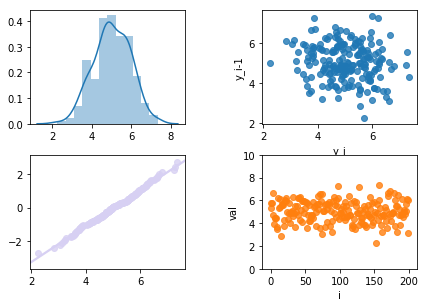

In [250]:
multiplePlots(things)

## <font color="red"><a href="https://www.theguardian.com/news/datablog/2010/jul/16/data-plural-singular">Do your data look</a> normally distributed?</font>
Explain why or why not.

Yes. From the histogram plot, it displays a good cluster in the middle, which is similar to the normal probability density function plot. 
From lag plot, it suggests there is no correlated relatinoship for y(i-1) with y(i), so it follows normal.
From the QQ plot, the plot follows the strght line very well, suggesting there is no heavy tail, so it is a good fit to normal distribution.
From the sequence plot, the value of points are unrelevant to index values, so it can be normal.

### Normally Distributed Tomatoes
From the above plots we can see that the randome sample of tomato weights follows a mostly normal distribution with very minimal left skewing, most likely caused by the frequency of observations under 100 grams. We find that it is mostly normally distributed because there is no visible skewing on the QQ plot either.

# <font color="red">END Q5</font>

# Univariate Data -- Summary
* Simple but valuable
* We want to know how data is distributed
* How does it fit known models/distributions
* When does it not?
 * Visual and analytical tests

# <font color="red">BEGIN Q6: </font>
The sample.csv file, included with today's lab, contains 9 variables (v0 through v9) that contain
measures drawn from different distributions.
Your task is to use the investigative techniques we discussed in today's lab to determine
what type of distribution the sample is drawn from.

You should first load the CSV file into a DataFrame, then look at various aspects of **each** variable.
Your responses should consist of code cells, as well as markdown cells that state something like:
> Variable v99 appears to be drawn from a uniform distribution with mean X and standard deviation Y.  
> A histogram of the data appears to be...
> The QQ plot shows.... 


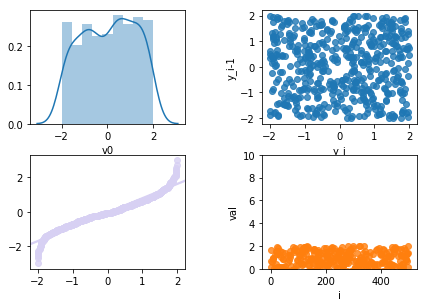

In [263]:
#Enter your code hre
data = pd.read_csv('data/sample.csv')
data.head()

multiplePlots(data.v0)

Variable v0 appears to be drawn from a uniform distribution with mean 0 and standard deviation 2*sqrt(3)/3.  
A histogram of the data appears to be 
The QQ plot shows 
Yes. From the histogram plot, it displays a good cluster in the middle, which is similar to the normal probability density function plot. 
From lag plot, it suggests there is random scatterplot.

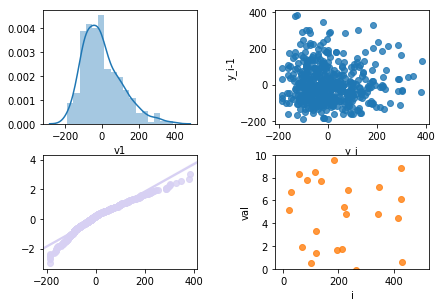

In [265]:
multiplePlots(data.v1)

Variable v1 appears to be a left skewed distribution

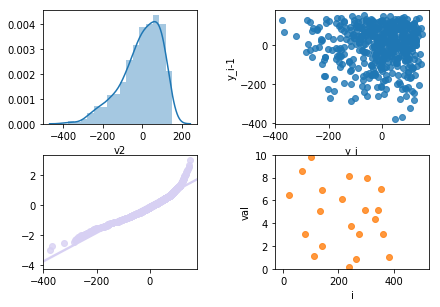

In [266]:
multiplePlots(data.v2)

Variable v2 appears to be a right skewed distribution.

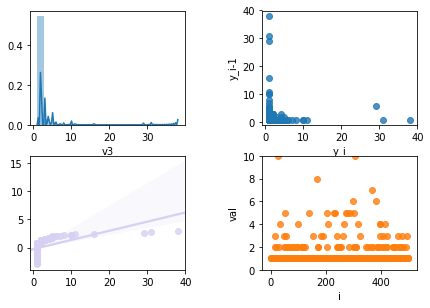

In [268]:
multiplePlots(data.v3)

Variable v3 appears to be a possion distribution. because all values are positive and it dereases sharply beyong some level.

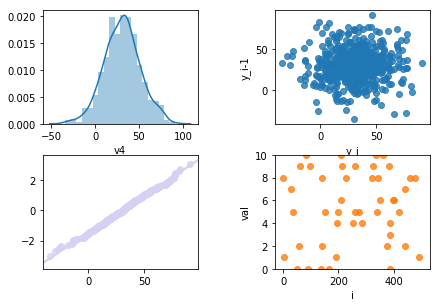

In [269]:
multiplePlots(data.v4)

Variable v4 appears to be drawn from a normal distribution with mean larger than zero. And it follows the qq plot well.

# END Q6

# ----------Vizualization----------

## Visualization for Data Scientists

We're going to ask a special virtual guest lecturer to provide some background on data visualization.  Together, we'll watch [a brief (8-video) by Dr. Chris Brooks](
https://www.coursera.org/learn/python-plotting/lecture/qrqqa/tools-for-thinking-about-design-alberto-cairo)
and pause it several times to answer the following questions:



## <font color="red">Q1a: As someone who is studying data science, who are you trying to reach through your visualizations?  </font>


_Explain your answer here._

## <font color="red">Q1b: What sense can you make of this image?</font>
![](resources/BrooksResearch.png)


_Explain your answer here._

## <font color="red">Q1c: How many different kinds of information can you see in the Minard graphic, and what are they?</font>

![](resources/Menard.png)

_Explain your answer here._


## Returning to Seaborn: 

https://seaborn.pydata.org/examples/index.html

Take a look at the different visualizations that are possible.

## <font color="red">Q2a: Provide the title, description, and URL of one of the visualizations that you find particularly interesting and explain why you find it interesting.  </font>

_Explain your answer here._

## <font color="red">Q2b: Given what we learned from Prof. Brooks, indicate 1-3 axes from Cairo's Visual Wheel where your chosen Seaborn visualization would likely score highly. Explain why.</font>

![](resources/CairoVisualWheel.png)

_Explain your answer here._

## Seaborn versus Matplotlib
* Matplotlib
     * Low-level, basis for many packages
     * Painful to construct certain graphs
     * Not Pandas friendly
     * Not interactive
* Seaborn
     * Pandas friendlier
     * Great for some stats plots


## Part 1: Iris dataset
![](resources/iris.png)

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
df = sns.load_dataset('iris')
df.head()

Remember our distplots:


In [ ]:
# Relationship between sepal length and width
sns.distplot(df.sepal_length)
sns.distplot(df.sepal_width)

## <font color="red"> Q3: Create similar plots for the other three numeric variables in the dataset. In a couple of sentences, describe each of the plots.  </font>

In [ ]:
#Enter your code here

_Explain your answer here._

We often want to see how variables vary with each other.  We'll get into the details 
in a few classes, but for now let's examine them visually.  In seaborn, we do this using 
the jointplot(). So, for example, if we wanted to look at the relationship between the
distributions of sepal_length and sepal_width, we could do something like:



In [ ]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df)

## <font color="red"> Q4: It's a bit difficult to see where the interesting areas in the plot are, so it's worth trying a hexbin plot.  Go ahead and copy the above  code block and add ```kind="hex"``` to the jointplot parameters. In a couple of sentences, describe what stands out to you about the visualization. </font>

In [ ]:
#Enter your code here

_Explain your answer here._

Now, take a look at what happens when you set ```kind="kde"```

In [ ]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df,kind="kde")

Finally, you may want to look at all the numeric variables in your
dataset. Use ```pairplot``` to do this:


In [ ]:
sns.pairplot(df.query("species == 'setosa'"))

We can get fancier by using a different column to set the color (or "hue"):

Try running the following code:

In [ ]:
sns.pairplot(df,hue="species")

Now let's introduce some correlations.  We're not going to spend time on learning about the 
theory behind correlation, as you've done that in the statistics prerequisite for this course.
Instead, we're going to jump right in and annotate a graph with a lot of statistical information:

In [ ]:
from scipy import stats

In [ ]:
# ignore the warning about deprecated annotation
g = sns.JointGrid(data=df,x='petal_length',y='sepal_length')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

Think about what the different components mean.  We'll return to using this in the next section on Wine Quality.

## Part 2: Wine quality
![](resources/vinho.png)
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
wine = pd.read_csv('data/winequality-red.csv')
wine.head()

In [ ]:
wine['isgood'] = np.where(wine['quality'] > 5, 'good','bad')

In [ ]:
sns.distplot(wine['fixed acidity'])

In [ ]:
wine.skew()

## Q5: Create a pairplot for the wine dataset that plots 'good' and 'bad' wines in different hues. In a couple of sentences, describe interesting relationships shown by the visualization.  

In [ ]:
#Enter your code here

_Explain your answer here._

## T-test

A t-test is a simple statistical model that's commonly used to test whether the means of two different
distributions are the same.  scipy.stats gives us a handy interface for this:

In [ ]:
goodwines = wine.query('isgood == "good"')
badwines = wine.query('isgood == "bad"')

In [ ]:
stats.ttest_ind(wine[wine.isgood == 'good']['fixed acidity'],wine[wine.isgood == 'bad']['fixed acidity'])

## Q6: Using the JointGrid approach we used above look at the relationship between sulphates and chlorides.  What patterns do you see?

In [ ]:
#Enter your code hre

_Explain your answer here._

## Ordinary Least Squares (OLS) Regression

We can get a lot more detail about the regression model by using statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

statsmodels uses R-Style formula: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables 

In [ ]:
model1 = smf.ols('chlorides ~ sulphates', data=wine).fit()
model1.summary()

# Commonly look at R-squared, F-statistic, coefficients

### Interesting things happen when we use OLS to do an ANOVA (look closely at the model):

In [ ]:
model2 = smf.ols('chlorides ~ isgood', data=wine).fit()
model2.summary()

### We might want to experiment with the original ```quality``` variable, either in a regression model:

In [ ]:
model3 = smf.ols('chlorides ~ quality', data=wine).fit()
model3.summary()

### or in an ANOVA (again, look closely at the model):

In [ ]:
model4 = smf.ols('chlorides ~ C(quality)', data=wine).fit() #Wrap it with C to convert to categorical
model4.summary()

## <font color="magenta">Q7: Use OLS to perform either a regression or an ANOVA on a variable (other than chlorides) and interpret your results.

In [ ]:
#Enter your code here

_Explain your answer here._

## Part 3:  Airplane Crashes and Fatalities
The next dataset we are going to look at is the full history of airplane crashes throughout the world, from 1908-2009.  It's taken from:

https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

In [ ]:
import pandas as pd
import seaborn as sns

We've provided the CSV file for this lab so you can go ahead and load it in the usual way:

In [ ]:
crashes = pd.read_csv('data/Airplane_Crashes_and_Fatalities_Since_1908.csv')

As always, you should take a look at the data to get a sense of 
what it's like:

In [ ]:
crashes.head()

As we mentioned in an earlier class, pandas is really good at helping
us deal with dates.  The 'Date' column in the dataframe contains 
strings that look like dates.  We can use the ```pandas.to_datetime()``` function to convert the strings to an internal datetime object
(see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html for more details):

In [ ]:
crashes['Date'] = pd.to_datetime(crashes['Date'])

And let's look at the dataframe again.  See any difference?

In [ ]:
crashes.head()

The pandas datetime object makes it easy to extract interesting 
parts of the date or time.  In our case, we're interested in extracting
the year, so we can do that with the following code:

In [ ]:
crashes['year'] = crashes['Date'].dt.year

And, as always, let's look at what we got:

In [ ]:
crashes.year.head()

As part of the final exercise in this class, let's create a 
visualization of the number of Fatalities per year:

In [ ]:
sns.barplot('year','Fatalities',data=crashes)

That doesn't look great, does it?  


## Q8: Create a barplot of the number of fatalities per decade and describe the results. 

Go ahead and create a new column called 'decade' 
that represents the decade for each year.  Remember that an integer divide (a.k.a. a floor divide) can be
done with the // operator.

What's the trend in airplane crash fatalities?

In [ ]:
#Enter your code here

_Explain your answer here._

## Part 4 (FYI): Functional Magnetic Resonance Imagining
![](resources/fmri.png)

In [ ]:
fmri = sns.load_dataset("fmri")

In [ ]:
fmri.head()

In [ ]:
fmri.describe()

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", ci=None, data=fmri);

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd",data=fmri);

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", estimator=None, data=fmri);

In [ ]:
sns.relplot(x = "timepoint", y = "signal", kind = "line", data = fmri, hue = "event");

In [ ]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, hue="region", style="event");